# Importing Libraries

In [12]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt


# 1: Statistical Risk Minimization

In [13]:
def sampleGenerator(m,n):
    A = np.random.binomial(1, 1/m, (m, n))
    return A

In [14]:
def linearModelSampleGenerator(A, Q):
    #y = Ax+w
    [m, n] = A.shape
    x = np.random.normal(np.zeros((Q, n)), np.sqrt(1/2/n))
    w = np.random.normal(np.zeros((Q, m)), np.sqrt(1/2/m))
    y = x @ A.T + w
    return x, y

In [15]:
def signLinearSampleGenerator(A, Q):
    [m, n] = A.shape
    x = np.random.normal(np.zeros((Q, n)), np.sqrt(1/2/n))
    w = np.random.normal(np.zeros((Q, m)), np.sqrt(1/2/m))
    y = np.sign(x @ A.T + w)
    return x, y

# 2: Empirical Risk Minimization

1. A solution to (7) is ø($x_{q}$) = $y_{q}$




2. Since the equation does not give us a way of predicting the outputs. There are many solutions to the equation making it difficult to use for predictions. This makes it a characteristic and not a viable solution by itself.

# 3: Learning Parameterizations

In [16]:
m=n=10^2
Q = 10^3
A = sampleGenerator(m,n)
X, Y = signLinearSampleGenerator(A, Q)

H = Y.T @ X @ np.linalg.inv(X.T @ X)

In [18]:
def l_mse(H, x, y):
    y_hat = x @ H.T
    return np.mean(0.5 * np.linalg.norm(y - y_hat, axis=1)**2)

In [19]:
loss = l_mse(H, X, Y)

In [20]:
print("The loss is: ", loss)

The loss is:  0.45809813227608487


In [21]:
A_1 = sampleGenerator(m,n)
X_1, Y_1 = linearModelSampleGenerator(A_1, Q)
H_1 = Y_1.T @ X_1 @ np.linalg.inv(X_1.T @ X_1)
loss_1 = l_mse(H_1, X_1, Y_1)
print("The loss is: ", loss_1)

The loss is:  0.04057567385554346


In [22]:
m=n=10^4
Q = 10^3
A_2 = sampleGenerator(m,n)
X_2, Y_2 = linearModelSampleGenerator(A_2, Q)
H_2 = Y_2.T @ X_2 @ np.linalg.inv(X_2.T @ X_2)
loss_2 = l_mse(H_2, X_2, Y_2)
print("The loss is: ", loss_2)

The loss is:  3.6807965032391974


# 4: Stochastic Gradient Descent

In [23]:
m=10**2
def Grad(X,Y,H):
    matricial=(1/X.shape[0] ) * (-Y.T+H@X.T)@(X)
    return matricial

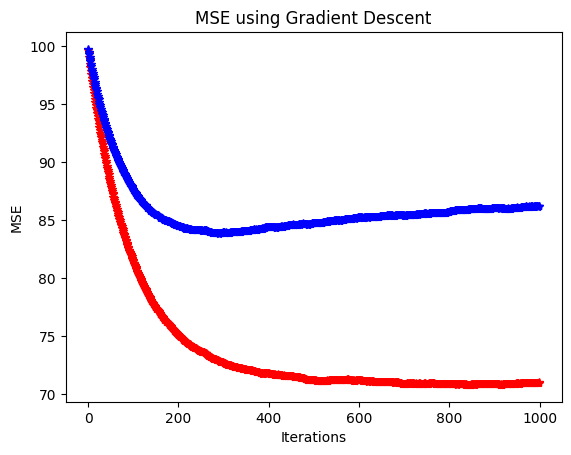

In [24]:
n=10**2
m=10**2
Q=10**3

b_size=10 #Batch Size
stepsize=1 #Stepsize, e.g. epsilon

A=sampleGenerator(m,n)
T_x,T_y=signLinearSampleGenerator(A,Q)
Test_x,Test_y=signLinearSampleGenerator(A,Q)

H=np.zeros((m,n))
error_train=[]
error_test=[]

for i in range(Q):
    permutation = np.random.permutation(Q) #Get an with the first Q integers in random order
    mb_x= np.array([T_x[index] for index in permutation[0:b_size] ])  # Sub Sample Training Set
    mb_y =np.array( [T_y[index] for index in permutation[0:b_size] ])  # Sub Sample Training Set

    grad=Grad(mb_x,mb_y,H) #Compute Gradient
    H=H-stepsize*grad #Compute the learning step


    error_train=error_train+[np.linalg.norm(T_y.T-H@T_x.T)**2/Q]
    error_test=error_test+[np.linalg.norm(Test_y.T-H@Test_x.T)**2/Q]


plt.plot(range(len(error_train)),error_train,'*r') #Plot
plt.plot(range(len(error_train)),error_test,'*b') #Plot

plt.title('MSE using Gradient Descent')
plt.xlabel('Iterations')
plt.ylabel('MSE')
plt.savefig('MSE_computing_grad.pdf', bbox_inches='tight', dpi=150)
plt.show()